In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [1]:
df = pd.read_csv("CADJPY_2020.csv")


NameError: name 'pd' is not defined

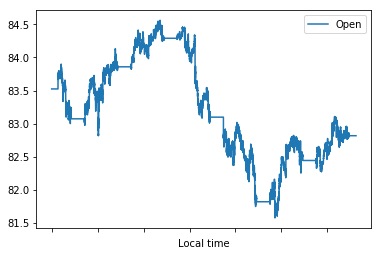

In [31]:
df.plot(x = 'Local time',y = 'Open')
plt.show()


In [125]:
time_steps_input = 30
x_temp = df['Open'].values
x_temp = x_temp[:x_temp.shape[0] - 30]
scaler = MinMaxScaler(feature_range = (0,1))
x_temp = scaler.fit_transform(x_temp.reshape(-1,1))


x = np.zeros((x_temp.shape[0], time_steps_input, 1))

for row in range(x_temp.shape[0] - 29):
    for time_step in range(time_steps_input):
        x[row,time_step,0] = x_temp[row + time_step, 0]
    

In [126]:
time_steps_output = 30
y_temp = df['Open'].values
y_temp = y_temp[time_steps_input:y_temp.shape[0] + time_steps_input]
y = np.zeros((x.shape[0], time_steps_output))
for row in range(y_temp.shape[0] - 29):
    for time_step in range(time_steps_output):
        y[row, time_step] = y_temp[row + time_step]
y = scaler.fit_transform(y)


In [127]:
x = x[:x.shape[0]-29,:,:]
y = y[:y.shape[0]-29,:]

In [128]:
print(y.shape)
print(x.shape)

(66181, 30)
(66181, 30, 1)


In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle = False)

In [130]:
model = Sequential()
model.add(LSTM((50), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(y_train.shape[1]))
model.compile(loss='mean_squared_error', metrics = ['acc'], optimizer='adam')
history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
 - 56s - loss: 0.0123 - acc: 0.0235
Epoch 2/50
 - 54s - loss: 1.9086e-06 - acc: 0.0428
Epoch 3/50
 - 54s - loss: 6.8408e-07 - acc: 0.0609
Epoch 4/50
 - 55s - loss: 7.4628e-07 - acc: 0.0348
Epoch 5/50
 - 55s - loss: 1.1955e-06 - acc: 0.0310
Epoch 6/50
 - 60s - loss: 1.1826e-06 - acc: 0.0376
Epoch 7/50
 - 59s - loss: 1.1278e-06 - acc: 0.0364
Epoch 8/50
 - 57s - loss: 1.0804e-06 - acc: 0.0368
Epoch 9/50
 - 61s - loss: 1.0217e-06 - acc: 0.0354
Epoch 10/50
 - 54s - loss: 9.7285e-07 - acc: 0.0398
Epoch 11/50
 - 54s - loss: 9.7124e-07 - acc: 0.0469
Epoch 12/50
 - 54s - loss: 9.1201e-07 - acc: 0.0412
Epoch 13/50
 - 54s - loss: 9.1185e-07 - acc: 0.0454
Epoch 14/50
 - 55s - loss: 8.5411e-07 - acc: 0.0421
Epoch 15/50
 - 481s - loss: 8.7978e-07 - acc: 0.0438
Epoch 16/50
 - 55s - loss: 8.4190e-07 - acc: 0.0501
Epoch 17/50
 - 54s - loss: 8.6033e-07 - acc: 0.0476
Epoch 18/50
 - 54s - loss: 8.3203e-07 - acc: 0.0456
Epoch 19/50
 - 55s - loss: 7.9708e-07 - acc: 0.0436
Epoch 20/50
 - 64s - los

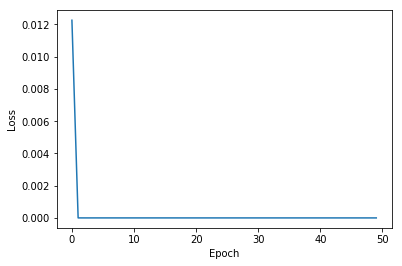

In [131]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [132]:
results = model.predict(x_test)

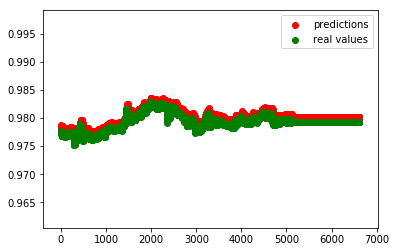

In [138]:
plt.scatter(range(results.shape[0]), results[:, 29], c = 'r', label = 'predictions')
plt.scatter(range(results.shape[0]), y_test[:, 29], c = 'g', label = 'real values')
plt.legend(prop = {'size': 10})
plt.show()